In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

from src.data_exploration.data_exploration import *

In [3]:
df = read_sqlite_table('housedata', './data/processed/rome_house_preprocessing.db')

In [4]:
df = df.drop('macrozoneId', axis=1)

In [5]:
df.columns

Index(['latitude', 'longitude', 'price', 'buildingYear', 'surface', 'rooms',
       'bathrooms', 'floor', 'garage', 'isNew', 'luxury', 'typology',
       'category', 'condition', 'features'],
      dtype='object')

In [6]:
df1 = df.copy()
df1 = df1[df1['latitude']!='None']
df1['latitude'] = df1['latitude'].astype('float32')
df1['longitude'] = df1['longitude'].astype('float32')

In [7]:
df1.shape

(15551, 15)

In [8]:
df2 = df1.copy()
df2['price'] = df2['price'].str.replace('€','').str.replace('.','').str.replace(' ','')
df2['price'] = df2['price'].astype(float)

C:\Users\raffa\AppData\Local\Temp\ipykernel_23124\1001120157.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['price'] = df2['price'].str.replace('€','').str.replace('.','').str.replace(' ','')


In [9]:
# df3 = df2.copy()
# df3['buildingYear'] = df3['buildingYear'].replace('None', np.nan).astype(float)

In [9]:
df4 = df2.copy()
df4[['surface','m2']] = df4['surface'].str.split(pat=" ", n= 1, expand=True)
df4 = df4.drop(['m2'], axis=1)
df4['surface'] = df4['surface'].str.replace('.','')
df4['surface'] = df4['surface'].astype(int)

C:\Users\raffa\AppData\Local\Temp\ipykernel_23124\3519034521.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['surface'] = df4['surface'].str.replace('.','')


In [10]:
df4['rooms'].value_counts()

3     5545
2     3811
4     2935
5+    1359
5     1281
1      620
Name: rooms, dtype: int64

In [11]:
df4['bathrooms'].value_counts()

1       8397
2       5443
3       1130
3+       578
None       3
Name: bathrooms, dtype: int64

In [12]:
df4 = df4[df4['bathrooms'] != 'None']

In [13]:
df['floor'].value_counts()

1       3118
2       2508
3       2069
T       1861
None    1606
4       1525
5        982
R        495
6        475
7        402
S        307
8        204
Name: floor, dtype: int64

In [15]:
df4['garage'].value_counts()

0     10445
1      4095
2       893
3        62
4        27
5         8
10        7
6         4
7         2
20        2
70        1
8         1
14        1
Name: garage, dtype: int64

In [26]:
df5 = df4.copy()
df5.loc[df1.groupby('garage')['garage'].transform('count').lt(20), 'garage'] = 'None'

In [27]:
df5['garage'].value_counts()

0       10445
1        4095
2         893
3          62
4          27
None       26
Name: garage, dtype: int64

In [28]:
df5 = df5[df5['garage'] != 'None']

In [29]:
df5.shape

(15522, 15)

In [30]:
df5['isNew'].value_counts()

False    14608
True       914
Name: isNew, dtype: int64

In [31]:
df5['isNew'] = df5['isNew'].replace('False', '0').replace('True', '1')
df5['isNew'] = df5['isNew'].astype(int)

In [32]:
df5['isNew'].value_counts()

0    14608
1      914
Name: isNew, dtype: int64

In [33]:
df5['luxury'].value_counts()

False    13732
True      1790
Name: luxury, dtype: int64

In [34]:
df5['luxury'] = df5['luxury'].replace('False', '0').replace('True', '1')
df5['luxury'] = df5['luxury'].astype(int)

In [35]:
df5['luxury'].value_counts()

0    13732
1     1790
Name: luxury, dtype: int64

In [36]:
df5['category'].value_counts()

Residenziale    15522
Name: category, dtype: int64

In [37]:
df5 = df5[df5['category'] != 'Palazzi - Edifici']

In [38]:
df5 = df5.drop('category', axis=1)

In [39]:
df5['typology'].value_counts()

Appartamento          14014
Attico - Mansarda       949
Villa                   334
Villetta a schiera      107
Loft                     54
Casa indipendente        54
Rustico - Casale         10
Name: typology, dtype: int64

In [40]:
df5['condition'].value_counts()

Buono / Abitabile         6452
Ottimo / Ristrutturato    4590
Da ristrutturare          2885
Nuovo / In costruzione    1467
None                       128
Name: condition, dtype: int64

In [41]:
df5.columns

Index(['latitude', 'longitude', 'price', 'buildingYear', 'surface', 'rooms',
       'bathrooms', 'floor', 'garage', 'isNew', 'luxury', 'typology',
       'condition', 'features'],
      dtype='object')

# one hot encoding solo di alcune features

In [42]:
df6 = df5.copy()

In [44]:
features = ['armadio a muro',
 'arredato',
 'balcone',
 'caminetto',
 'cancello elettrico',
 'cantina',
 'cucina',
 'esposizione doppia',
 'esposizione est',
 'esposizione esterna',
 'esposizione interna',
 'esposizione nord',
 'esposizione ovest',
 'esposizione sud',
 'fibra ottica',
 'giardino comune',
 'giardino privato',
 'giardino privato e comune',
 'idromassaggio',
 'impianto di allarme',
 'impianto tv centralizzato',
 'impianto tv con parabola satellitare',
 'impianto tv singolo',
 'infissi esterni in doppio vetro / legno',
 'infissi esterni in doppio vetro / metallo',
 'infissi esterni in doppio vetro / pvc',
 'infissi esterni in triplo vetro / legno',
 'infissi esterni in triplo vetro / metallo',
 'infissi esterni in triplo vetro / pvc',
 'infissi esterni in vetro / legno',
 'infissi esterni in vetro / metallo',
 'infissi esterni in vetro / pvc',
 'parzialmente arredato',
 'piscina',
 'porta blindata',
 'portiere intera giornata',
 'portiere mezza giornata',
 'reception',
 'solo cucina arredata',
 'taverna',
 'terrazza',
 'videocitofono']

In [45]:
for feature in features:
    df6[feature] = 0
    
df6['features'] = df6['features'].str.lower()

for feature in features:
    if feature == 'balcone':
        df6.loc[(df6['features'].str.contains(feature)) | df6['features'].str.contains('balconi'), feature] = 1
    else:
         df6.loc[(df6['features'].str.contains(feature)), feature] = 1

In [46]:
df6 = df6.drop('features', axis=1)

In [47]:
df6

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
0,41.854401,12.50600,219000.0,None,65,2,1,T,0,0,...,0,0,1,0,0,0,0,0,0,0
1,41.854401,12.50600,219000.0,None,65,2,1,T,0,0,...,0,0,1,0,0,0,0,0,0,0
2,41.845798,12.54560,96000.0,1950-1959,114,3,1,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,41.845501,12.48950,500000.0,1970-1979,122,4,2,4,1,0,...,0,0,1,1,0,0,0,0,1,1
4,41.839802,12.53980,89000.0,1950-1959,50,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,41.880199,12.48320,1950000.0,None,135,4,3,5,1,0,...,0,0,1,1,0,0,0,0,1,0
15547,41.880199,12.48320,550000.0,None,60,2,1,2,0,0,...,1,0,1,1,0,0,0,0,1,0
15548,41.875801,12.48760,240000.0,1970-1979,47,2,1,S,0,0,...,0,0,0,0,0,0,0,0,0,0
15549,41.877300,12.48130,690000.0,None,110,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


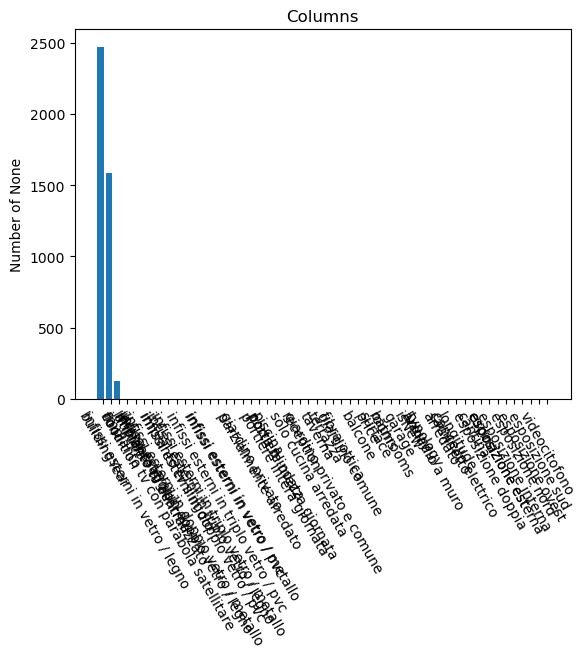

In [48]:
plot_bar(df6, 'None')

In [49]:
save_to_sql('./data/processed/rome_house_cleaned.db', df6, 'housedata')

In [50]:
df6

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
0,41.854401,12.50600,219000.0,None,65,2,1,T,0,0,...,0,0,1,0,0,0,0,0,0,0
1,41.854401,12.50600,219000.0,None,65,2,1,T,0,0,...,0,0,1,0,0,0,0,0,0,0
2,41.845798,12.54560,96000.0,1950-1959,114,3,1,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,41.845501,12.48950,500000.0,1970-1979,122,4,2,4,1,0,...,0,0,1,1,0,0,0,0,1,1
4,41.839802,12.53980,89000.0,1950-1959,50,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,41.880199,12.48320,1950000.0,None,135,4,3,5,1,0,...,0,0,1,1,0,0,0,0,1,0
15547,41.880199,12.48320,550000.0,None,60,2,1,2,0,0,...,1,0,1,1,0,0,0,0,1,0
15548,41.875801,12.48760,240000.0,1970-1979,47,2,1,S,0,0,...,0,0,0,0,0,0,0,0,0,0
15549,41.877300,12.48130,690000.0,None,110,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
